# EMC^2 demo notebook

In this notebook we show an example of how to run EMC2 using ModelE and HSRL data

In [20]:
import emc2
import act
from datetime import datetime
%pylab inline

from dask_kubernetes import KubeCluster
from distributed import LocalCluster, Client

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'dask_kubernetes'

First, we load the model data using the ModelE object

In [6]:
model_path = 'allvars.SCM_AWR_linft_BT0_unNa_noaer.nc'
my_model = emc2.core.model.ModelE(model_path)

After that, we load in the KAZR data using the KAZR object.

In [3]:
KAZR = emc2.core.instruments.KAZR('nsa')
KAZR.read_arm_netcdf_file('awrkazrcorgeM1.c0.20160816.000001.nc')

In [19]:
KAZR.ds

<xarray.Dataset>
Dimensions:                                   (range: 600, time: 43262)
Coordinates:
  * time                                      (time) datetime64[ns] 2016-08-16T00:00:01.172000 ... 2016-08-16T23:59:58.015000
  * range                                     (range) float32 100.679245 ... 18058.242
Data variables:
    base_time                                 datetime64[ns] 2016-08-16
    time_offset                               (time) datetime64[ns] 2016-08-16T00:00:01.172000 ... 2016-08-16T23:59:58.015000
    reflectivity_copol                        (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_reflectivity_copol                     (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    gaseous_attenuation_correction_copol      (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_gaseous_attenuation_correction_copol   (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    mean_doppler_velocity_copol               (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_mean_doppler_velocity_copol            (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    spectral_width_copol                      (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_spectral_width_copol                   (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    signal_to_noise_ratio_copol               (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    significant_detection_mask                (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    mean_doppler_velocity_copol_dealias_flag  (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    rx_noise                                  (time) float32 dask.array<chunksize=(43262,), meta=np.ndarray>
    sky_noise_copol                           (time) float32 dask.array<chunksize=(43262,), meta=np.ndarray>
    cold_noise_copol                          (time) float32 dask.array<chunksize=(43262,), meta=np.ndarray>
    hot_noise_copol                           (time) float32 dask.array<chunksize=(43262,), meta=np.ndarray>
    temp                                      (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_temp                                   (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    rh                                        (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_rh                                     (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    bar_pres                                  (time, range) float32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    qc_bar_pres                               (time, range) int32 dask.array<chunksize=(43262, 600), meta=np.ndarray>
    lat                                       float32 ...
    lon                                       float32 ...
    alt                                       float32 ...
Attributes:
    command_line:                idl -R -n kazrcorc0 -s awr -f M1 -b 20160816...
    Conventions:                 ARM-1.2
    process_version:             vap-kazrcor-5.0.0-devel
    input_datastreams:           awrkazrgeM1.a1 : 2.8 : 20160816.000001\nawrk...
    dod_version:                 kazrcorge-c0-1.5
    site_id:                     awr
    platform_id:                 kazrcorge
    facility_id:                 M1
    data_level:                  c0
    location_description:        ARM West Antarctic Radiation Experiment (AWA...
    datastream:                  awrkazrcorgeM1.c0
    antenna_altitude:            3.66 m
    antenna_diameter:            1.81 m
    attenuation_short_pulse:     4.000000 dB
    clutter_filter_len:          0
    fft_len:                     512
    num_spectral_averages:      

The following command will generate 8 subcolumns per time period of simulated KAZR data.

In [4]:
Cluster = LocalCluster(n_workers=2)
client = Client(Cluster)
client

Client Scheduler: tcp://127.0.0.1:49407 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 8 Memory: 17.07 GB


In [7]:
%time my_model = emc2.simulator.main.make_simulated_data(my_model, KAZR, 4, parallel=True)

## Creating subcolumns...


C:\Users\rjackson\AppData\Local\Continuum\anaconda3\envs\emc2_env\lib\site-packages\dask\core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\rjackson\AppData\Local\Continuum\anaconda3\envs\emc2_env\lib\site-packages\dask\core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\rjackson\AppData\Local\Continuum\anaconda3\envs\emc2_env\lib\site-packages\dask\core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\rjackson\AppData\Local\Continuum\anaconda3\envs\emc2_env\lib\site-packages\dask\core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\rjackson\AppData\Local\Continuum\anaconda3\envs\emc2_env\lib\site-packages\dask\core.py:121: RuntimeWarning: invalid value encounte

Generating radar moments...
Generating stratiform radar moments for hydrometeor class cl
Doing parallel calculation for pl
Generating stratiform radar moments for hydrometeor class pl
Doing parallel calculation for ci
Generating stratiform radar moments for hydrometeor class ci
Doing parallel calculation for pi
Generating stratiform radar moments for hydrometeor class pi
Doing parallel calculation for cl
Wall time: 9min 49s


In [5]:
my_model.ds

<xarray.Dataset>
Dimensions:                    (plm: 63, subcolumn: 8, time: 240)
Coordinates:
  * plm                        (plm) float64 995.0 985.0 975.0 ... 0.247 0.139
  * time                       (time) datetime64[ns] 2016-08-16T01:15:00 ... 2016-08-21T00:45:00
  * subcolumn                  (subcolumn) int64 0 1 2 3 4 5 6 7
    lat                        float32 -77.85
    lon                        float32 166.72
Data variables:
    QCImc                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    QCLmc                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    QPImc                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    QPLmc                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    axyp                       float32 dask.array<chunksize=(), meta=np.ndarray>
    cIWPss                     (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    cLWPss                     (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    cldmc                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldmc_2d                   (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    cldmcci                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldmccl                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldmcpi                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldmcpl                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldss                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldss_2d                   (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    cldssci                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldsscl                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldsspi                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldsspl                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    cldtot_2d                  (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    dq_ls                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dq_mc                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dq_nudge                   (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dq_ss                      (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dq_turb                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_ls                     (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_lw                     (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_mc                     (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_nudge                  (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_rad                    (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_ss                     (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_sw                     (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    dth_turb                   (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    e_turb                     (time, plm) float32 dask.array<chunksize=(240, 63), meta=np.ndarray>
    gtempr                     (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    isccp_tau                  (time) float32 dask.array<chunksize=(240,), meta=np.ndarray>
    iwp                       

## Write results to a file

In [6]:
my_model.subcolumns_to_netcdf('subcolumn_data.nc')

EMC^2 interacts with the [Atmospheric Community Toolkit](https://arm-doe.github.io/ACT) for easy to create visualizations. You can use the TimeSeriesDisplay object to make visualizations of both the observation and simulated radar parameters.

## Read results from a file

If you don't want to wait for the subcolumns to generate every time you do analysis, you can load previously generated data on the fly!

In [4]:
model_path = 'allvars.SCM_AWR_linft_BT0_unNa_noaer.nc'
my_model = emc2.core.model.ModelE(model_path)
my_model.load_subcolumns_from_netcdf('subcolumn_data.nc')

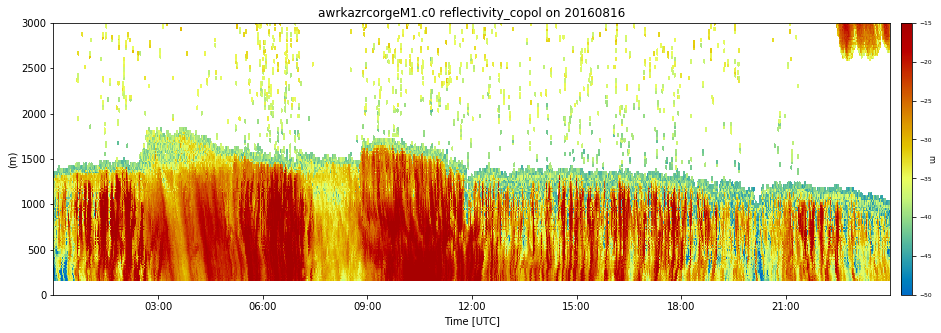

In [8]:
KAZR.ds = KAZR.ds.where(KAZR.ds.significant_detection_mask == 1)
display = act.plotting.TimeSeriesDisplay(KAZR.ds, figsize=(15,5))
display.plot('reflectivity_copol', cmap='act_HomeyerRainbow', subplot_index=(0, ), vmin=-50, vmax=-15)
display.axes[0].set_ylim([0, 3000])
display.fig.savefig('Obs.png', dpi=150)

In [18]:
display.fig.savefig('Kazr_refl.png', dpi=300)

(736192.0, 736193.0)

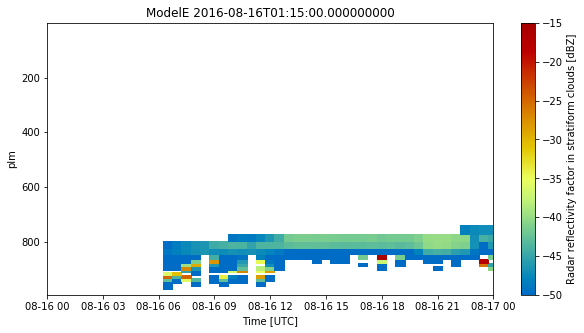

In [19]:
model_display = emc2.plotting.SubcolumnDisplay(my_model, subplot_shape=(1,), figsize=(10, 5))
model_display.plot_subcolumn_timeseries('sub_col_Ze_tot_strat', 3, subplot_index=(0,), cmap='act_HomeyerRainbow', vmin=-50, vmax=-15)
model_display.axes[0].set_xlim([datetime.datetime(2016, 8, 16, 0, 0), datetime.datetime(2016, 8, 17, 0, 0)])
#model_display.fig.savefig('Columns.png', dpi=150)

In [22]:
new_ds = xr.Dataset({'p_3d': my_model.ds["p_3d"], 'sub_col_Ze_cl_strat': my_model.ds["sub_col_Ze_cl_strat"]})
new_ds.to_netcdf('test_subcol.20160816.000000.nc')